In [185]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [186]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [187]:
import zipfile
ref = zipfile.ZipFile('/content/sms-spam-collection-dataset.zip')
ref.extractall('\content')
ref.close()

In [188]:
import os
import numpy as np
import pandas as pd

In [189]:
df = pd.read_csv('/content/\content/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [190]:
df.shape

(5572, 5)

Steps ===========>

1. Data Cleaning
2. EDA
3. Text preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website
8. Deployment

1. Data Cleaning

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [192]:
# Drop last 3 columns

df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [193]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [194]:
# Renaming columns

df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [195]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [196]:
# Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [197]:
# Dublicate Values
df.duplicated().sum()

403

In [198]:
# Remove Duplicates

df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

2. EDA

In [199]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [200]:
  import matplotlib.pyplot as plt

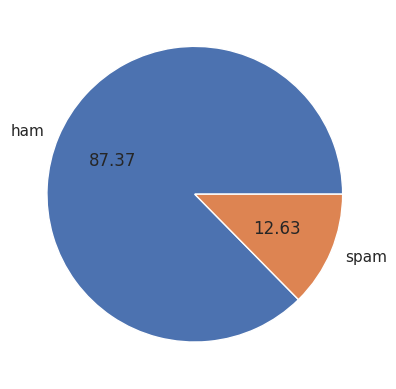

In [201]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct= "%0.2f")
plt.show()

Data is imbalanced


In [202]:
import nltk

In [203]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [204]:
df['num_chars'] = df['text'].apply(len)
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [205]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [206]:
df['num_sents'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [207]:
df[['num_chars', 'num_words', 'num_sents']].describe()

,num_chars,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [208]:
# HAM
df[df['target'] == 0][['num_chars', 'num_words', 'num_sents']].describe()

,num_chars,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [209]:
# SPAM
df[df['target'] == 1][['num_chars', 'num_words', 'num_sents']].describe()

,num_chars,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [210]:
import seaborn as sns
sns.set()

<Axes: xlabel='num_chars', ylabel='Count'>

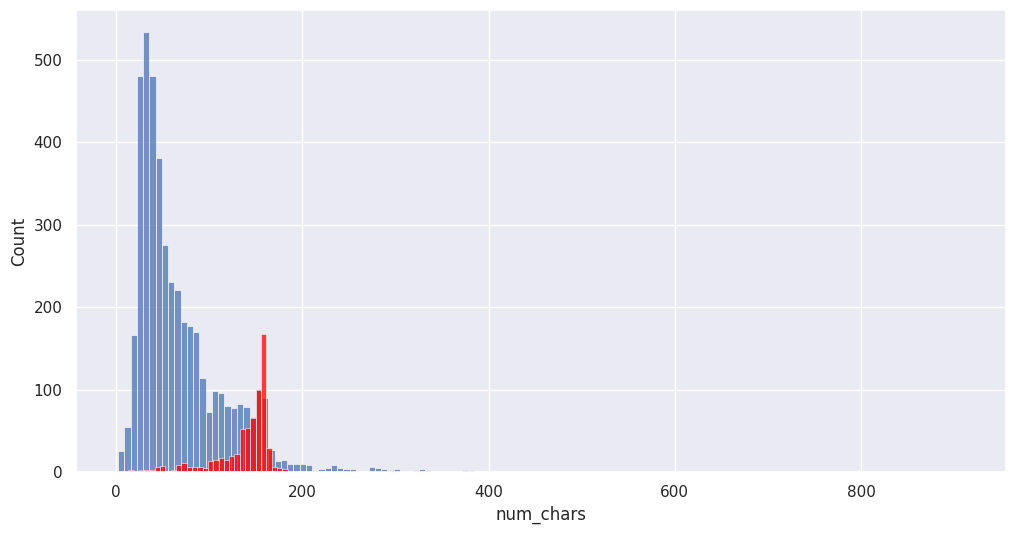

In [211]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'], color= 'red')

<Axes: xlabel='num_words', ylabel='Count'>

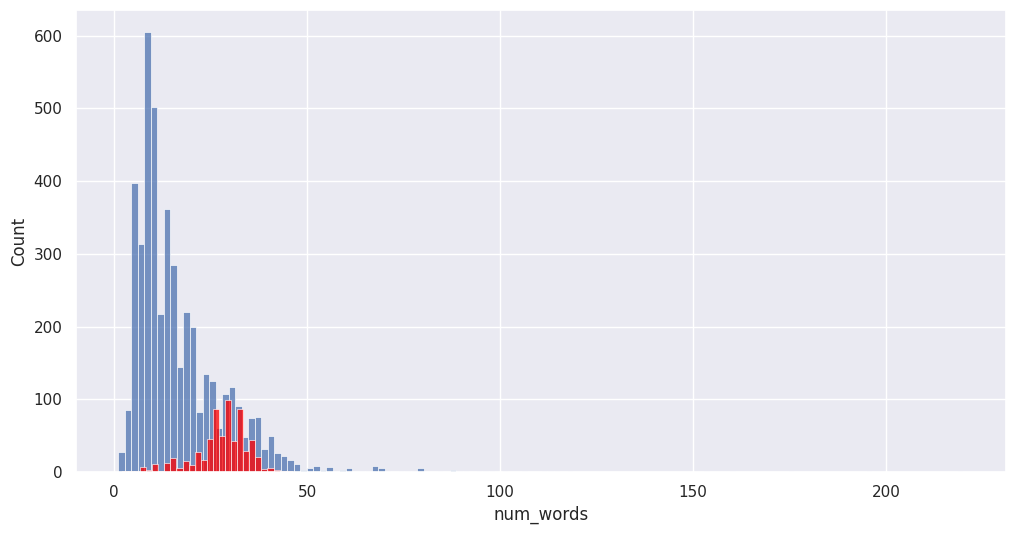

In [212]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color= 'red')

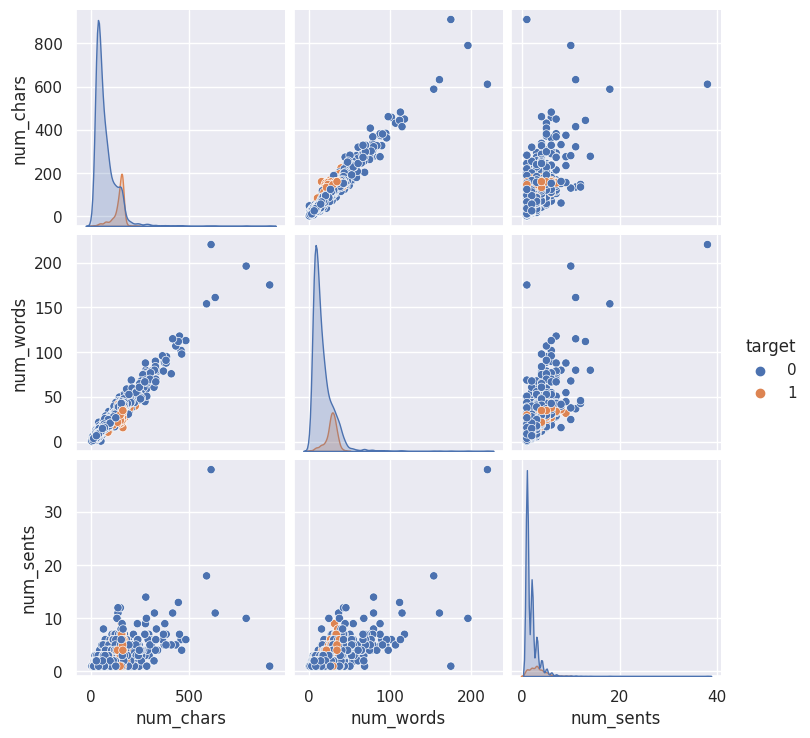

In [213]:
sns.pairplot(df, hue= 'target')

<ipython-input-214-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

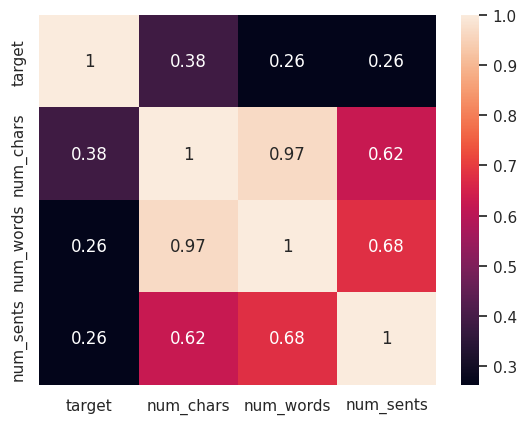

In [214]:
sns.heatmap(df.corr(), annot=True)

3. Data Preprocessing

- Lower case
- Tokenize
- Removing special characters
- Removing stop words and punctuation
- stemming/lemmitization


In [215]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [216]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [217]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [218]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)


  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()


  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [219]:
df['transformed_text'] = df['text'].apply(transform_text)

In [220]:
df.head()

,target,text,num_chars,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [221]:
from wordcloud import WordCloud

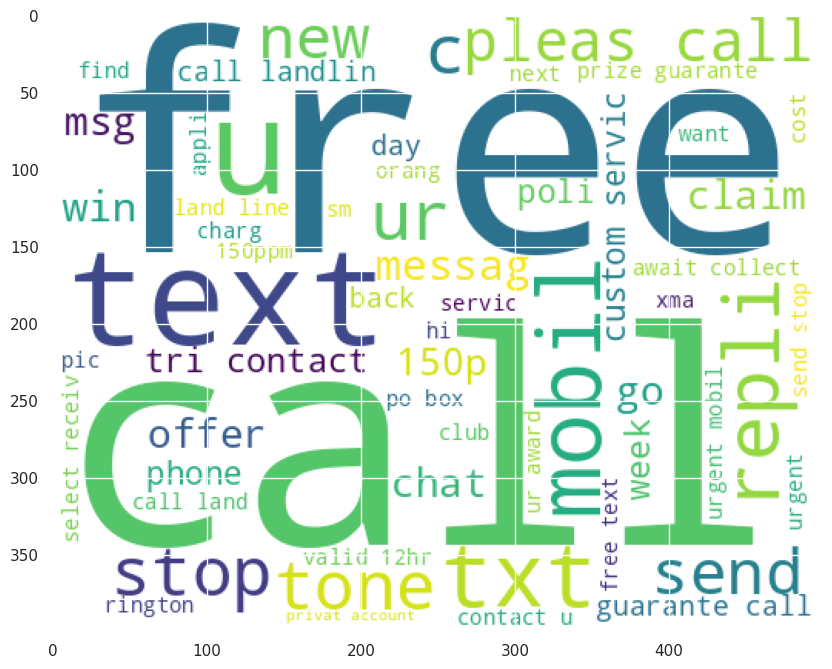

In [222]:
# SPAM_WordCloud
wc = WordCloud(width = 500, height= 400, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep =" "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

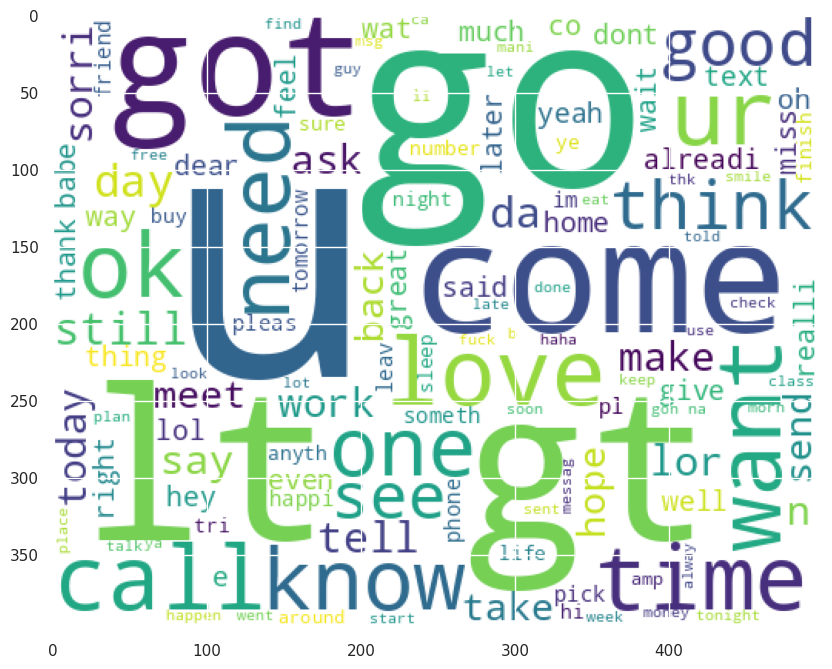

In [223]:
# HAM_WordCloud
wc = WordCloud(width = 500, height= 400, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep =" "))
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [224]:
df.head()

,target,text,num_chars,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [225]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

len(spam_corpus)

9939

In [226]:
from collections import Counter

In [227]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

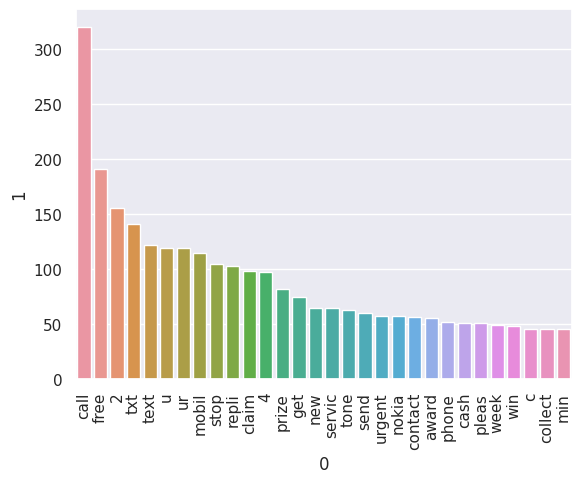

In [228]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [229]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

len(ham_corpus)

35404

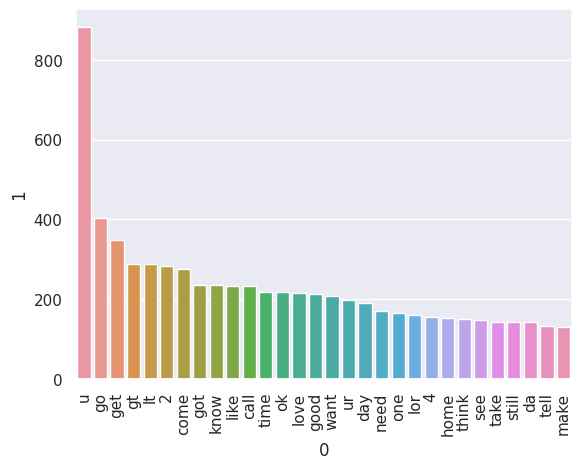

In [230]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

4. Model Building

In [231]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [232]:
x = cv.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 6708)

In [233]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [234]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [235]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [236]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [237]:
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print("*********"*10)
print(confusion_matrix(y_test, y_pred_gnb))
print("*********"*10)
print(precision_score(y_test, y_pred_gnb))

0.8684719535783365
******************************************************************************************
[[779 114]
 [ 22 119]]
******************************************************************************************
0.5107296137339056


In [238]:
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_mnb))
print("*********"*10)
print(confusion_matrix(y_test, y_pred_mnb))
print("*********"*10)
print(precision_score(y_test, y_pred_mnb))

0.9758220502901354
******************************************************************************************
[[876  17]
 [  8 133]]
******************************************************************************************
0.8866666666666667


In [239]:
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
print("Accuracy_score\n", accuracy_score(y_test, y_pred_bnb))
print("*********"*10)
print("Confusion_matrix\n",confusion_matrix(y_test, y_pred_bnb))
print("*********"*10)
print("Precision_score\n",precision_score(y_test, y_pred_bnb))

Accuracy_score
 0.9671179883945842
******************************************************************************************
Confusion_matrix
 [[892   1]
 [ 33 108]]
******************************************************************************************
Precision_score
 0.9908256880733946


Using TF-IDF


In [240]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

In [242]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [243]:
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print("*********"*10)
print(confusion_matrix(y_test, y_pred_gnb))
print("*********"*10)
print(precision_score(y_test, y_pred_gnb))

0.8655705996131529
******************************************************************************************
[[781 112]
 [ 27 114]]
******************************************************************************************
0.504424778761062


In [244]:
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_mnb))
print("*********"*10)
print(confusion_matrix(y_test, y_pred_mnb))
print("*********"*10)
print(precision_score(y_test, y_pred_mnb))

0.9506769825918762
******************************************************************************************
[[893   0]
 [ 51  90]]
******************************************************************************************
1.0


In [245]:
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
print("Accuracy_score\n", accuracy_score(y_test, y_pred_bnb))
print("*********"*10)
print("Confusion_matrix\n",confusion_matrix(y_test, y_pred_bnb))
print("*********"*10)
print("Precision_score\n",precision_score(y_test, y_pred_bnb))

Accuracy_score
 0.9671179883945842
******************************************************************************************
Confusion_matrix
 [[892   1]
 [ 33 108]]
******************************************************************************************
Precision_score
 0.9908256880733946


We choose TFIDF with MultinomialNB as precision is an important metrics

Trying other algorithms/models


In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [247]:
lr = LogisticRegression(solver= 'liblinear', penalty='l1')
svc = SVC(kernel= 'sigmoid', gamma=1.0)
mnb = MultinomialNB()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(n_estimators=50, random_state=2)
ada = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [248]:
clfs = {
    'LR' : lr,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dt,
    'RF' : rf,
    'ADA' : ada,
    'BC' : bc,
    'ETC' : etc,
    'GBC' : gbc,
    'XGB' : xgb
}

In [249]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [250]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

  print("For", name)
  print("Accuracy", current_accuracy)
  print("Precision", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For LR
Accuracy 0.9390715667311412
Precision 0.875
For SVC
Accuracy 0.960348162475822
Precision 0.923728813559322
For NB
Accuracy 0.9506769825918762
Precision 1.0
For DT
Accuracy 0.9226305609284333
Precision 0.8351648351648352
For RF
Accuracy 0.9574468085106383
Precision 1.0
For ADA
Accuracy 0.9516441005802708
Precision 0.9026548672566371
For BC
Accuracy 0.9574468085106383
Precision 0.888
For ETC
Accuracy 0.9690522243713733
Precision 1.0
For GBC
Accuracy 0.9410058027079303
Precision 0.925531914893617
For XGB
Accuracy 0.9613152804642167
Precision 0.9243697478991597


In [251]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.950677,1.000000
4,RF,0.957447,1.000000
7,ETC,0.969052,1.000000
8,GBC,0.941006,0.925532
9,XGB,0.961315,0.924370
1,SVC,0.960348,0.923729
5,ADA,0.951644,0.902655
6,BC,0.957447,0.888000
0,LR,0.939072,0.875000
3,DT,0.922631,0.835165


In [252]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.950677
1,RF,Accuracy,0.957447
2,ETC,Accuracy,0.969052
3,GBC,Accuracy,0.941006
4,XGB,Accuracy,0.961315
5,SVC,Accuracy,0.960348
6,ADA,Accuracy,0.951644
7,BC,Accuracy,0.957447
8,LR,Accuracy,0.939072
9,DT,Accuracy,0.922631


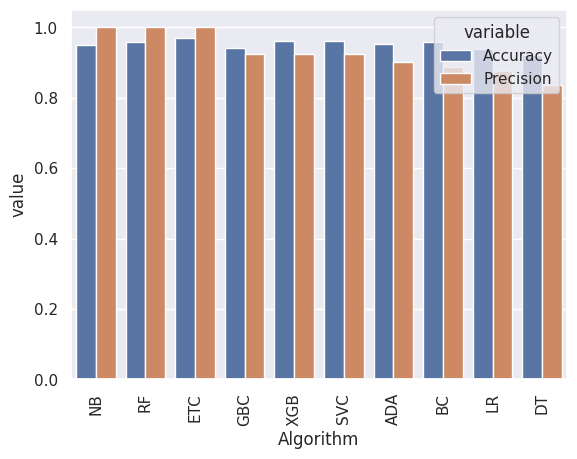

In [255]:
sns.barplot(x  ='Algorithm', y='value', hue='variable', data =performance_df1, )
plt.xticks(rotation= 'vertical')
plt.show()

In [256]:
tfidf = TfidfVectorizer(max_features= 3000)
x = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [257]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

In [258]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

  print("For", name)
  print("Accuracy", current_accuracy)
  print("Precision", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For LR
Accuracy 0.9400386847195358
Precision 0.883495145631068
For SVC
Accuracy 0.9661508704061895
Precision 0.9274193548387096
For NB
Accuracy 0.9738878143133463
Precision 1.0
For DT
Accuracy 0.9294003868471954
Precision 0.8469387755102041
For RF
Accuracy 0.9622823984526112
Precision 1.0
For ADA
Accuracy 0.9584139264990329
Precision 0.9152542372881356
For BC
Accuracy 0.9564796905222437
Precision 0.8870967741935484
For ETC
Accuracy 0.9700193423597679
Precision 0.9910714285714286
For GBC
Accuracy 0.9439071566731141
Precision 0.9278350515463918
For XGB
Accuracy 0.9593810444874274
Precision 0.9159663865546218


In [260]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_new':accuracy_scores, 'Precision_new':precision_scores}).sort_values('Precision_new', ascending=False)
temp_df

,Algorithm,Accuracy_new,Precision_new
2,NB,0.973888,1.000000
4,RF,0.962282,1.000000
7,ETC,0.970019,0.991071
8,GBC,0.943907,0.927835
1,SVC,0.966151,0.927419
9,XGB,0.959381,0.915966
5,ADA,0.958414,0.915254
6,BC,0.956480,0.887097
0,LR,0.940039,0.883495
3,DT,0.929400,0.846939


In [262]:
df_new = pd.concat([performance_df, temp_df], axis = 1, join='inner')
df_new

,Algorithm,Accuracy,Precision,Algorithm,Accuracy_new,Precision_new
2,NB,0.950677,1.000000,NB,0.973888,1.000000
4,RF,0.957447,1.000000,RF,0.962282,1.000000
7,ETC,0.969052,1.000000,ETC,0.970019,0.991071
8,GBC,0.941006,0.925532,GBC,0.943907,0.927835
9,XGB,0.961315,0.924370,XGB,0.959381,0.915966
1,SVC,0.960348,0.923729,SVC,0.966151,0.927419
5,ADA,0.951644,0.902655,ADA,0.958414,0.915254
6,BC,0.957447,0.888000,BC,0.956480,0.887097
0,LR,0.939072,0.875000,LR,0.940039,0.883495
3,DT,0.922631,0.835165,DT,0.929400,0.846939


In [264]:
df_1= pd.merge(left = performance_df, right =temp_df, on = 'Algorithm')
df_1

,Algorithm,Accuracy,Precision,Accuracy_new,Precision_new
0,NB,0.950677,1.000000,0.973888,1.000000
1,RF,0.957447,1.000000,0.962282,1.000000
2,ETC,0.969052,1.000000,0.970019,0.991071
3,GBC,0.941006,0.925532,0.943907,0.927835
4,XGB,0.961315,0.924370,0.959381,0.915966
5,SVC,0.960348,0.923729,0.966151,0.927419
6,ADA,0.951644,0.902655,0.958414,0.915254
7,BC,0.957447,0.888000,0.956480,0.887097
8,LR,0.939072,0.875000,0.940039,0.883495
9,DT,0.922631,0.835165,0.929400,0.846939


In [265]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))